# Task2-金融风控模型-探索性数据分析（EDA）

## 1 Load Package and Data

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-white')           #风格设置近似R这种的ggplot库
plt.rcParams["font.sans-serif"] = ["Microsoft YaHei"]  #字体乱码
plt.rcParams['font.family']='sans-serif'               #字体乱码  
plt.rcParams['axes.unicode_minus'] = False            #数字为负
# 设置精度
pd.set_option('display.float_format', lambda x: '%.2f'%x)

%matplotlib inline

train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/testA.csv')



## 2 基础情况了解

In [6]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/testA.csv')

### 2.1 查看数据集大小

In [9]:
# 查看数据行列情况
print("训练数据集大小：{}".format(train_df.shape))
print("测试数据集大小：{}".format(test_df.shape))

训练数据集大小：(800000, 47)
测试数据集大小：(200000, 46)


## 3 数据空值及占比情况

In [28]:
# def not_null_count(column):
#     column_null = pd.isnull(column)  #判断某列属性是否存在缺失值
#     null = column[column_null]
#     return len(null)

def missing_values_table(df):
    """统计制定数据框中的缺失值大小

    :param df:
    :return:
    """
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns


# 训练集空值情况
missing_values_table(train_df)

Your selected dataframe has 47 columns.
There are 22 columns that have missing values.


,Missing Values,% of Total Values
n11,69752,8.7
employmentLength,46799,5.8
n8,40271,5.0
n14,40270,5.0
n13,40270,5.0
n12,40270,5.0
n9,40270,5.0
n0,40270,5.0
n1,40270,5.0
n2,40270,5.0


In [29]:
# 测试集空值情况
missing_values_table(test_df)

Your selected dataframe has 46 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
n11,17575,8.8
employmentLength,11742,5.9
n6,10111,5.1
n13,10111,5.1
n12,10111,5.1
n9,10111,5.1
n8,10111,5.1
n7,10111,5.1
n5,10111,5.1
n3,10111,5.1


通过上述空值分析,在训练数据集、测试数据集中n0-n14个匿名变量中均在空值的情况，匿名变量占比最高的n11变量占比达8.8%。由于是匿名变量不了解数据含义，因而给空值变量弥补添加了一些困难。



## 4 分类标签变量分布情况

分类变量标签为isDefault，为什么在训练集中间，感觉有点怪怪的

In [40]:
print("不同分类变量的数量\n",train_df.isDefault.value_counts())

print("不同分类变量的占比\n",train_df.isDefault.value_counts()/train_df.shape[0])

不同分类变量的数量
 0    640390
1    159610
Name: isDefault, dtype: int64
不同分类变量的占比
 0    0.800488
1    0.199513
Name: isDefault, dtype: float64


文中并未支出0、1分别代表的业务含义，根据实际贷款业务情况可以得知大部分客户是正常，因而0代表不违约客户，1代表违约客户。判断违约客户占比为20%，是否有点高了呢？另对于5:1的类别变迁，是否会被认为是样本分布不均匀呢？

## 5 不同类别数据与分类变量的相关性

In [74]:
categorical_col = train_df.select_dtypes(include=["object"]).columns.to_list()
#categorical_val = categorical_val
numeric_col = train_df.select_dtypes(exclude=["object"]).columns.to_list()
numeric_col.remove('id') # 删除id变量






### 5.1 统计数字变量分布情况

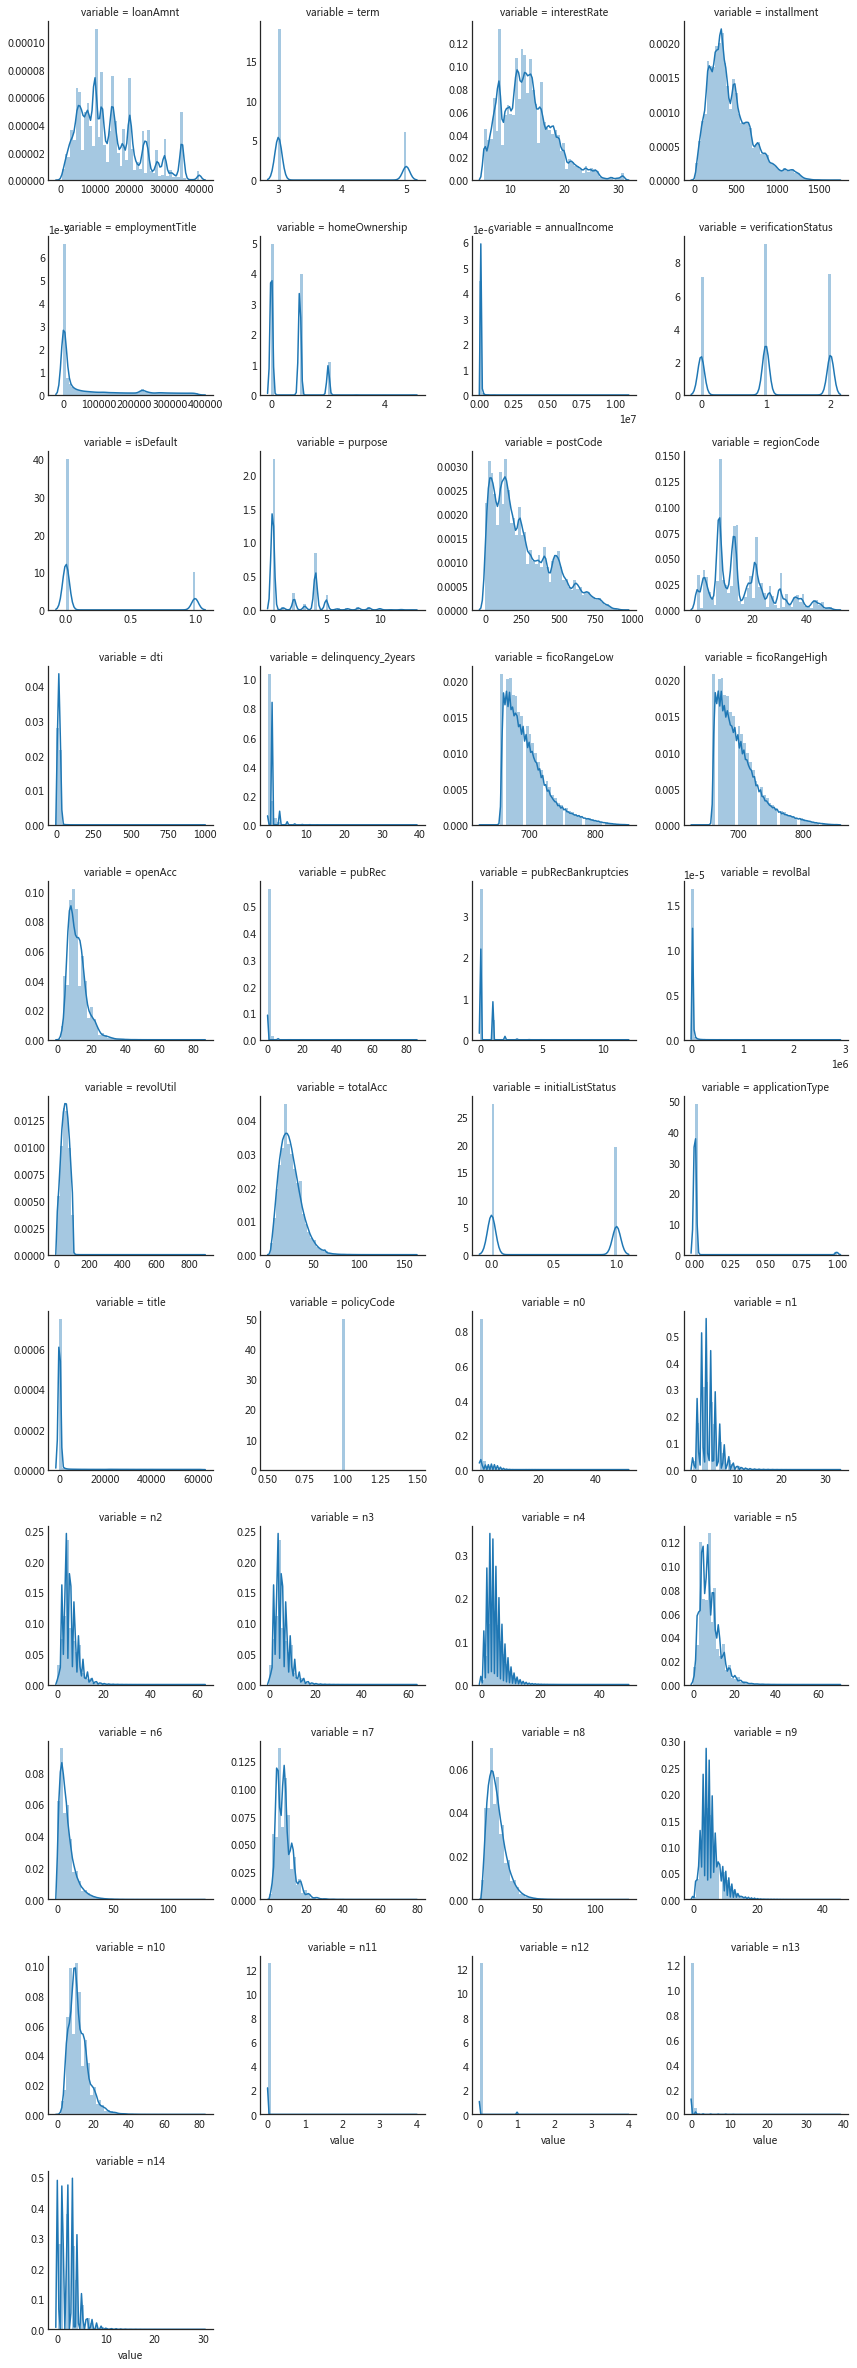

In [72]:
## 3) 每个数字特征得分布可视化
f = pd.melt(train_df, value_vars=numeric_col)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")



### 5.2 统计分类变量的分布情况

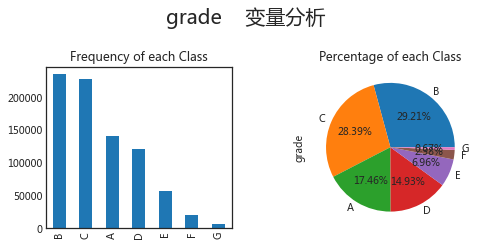

grade


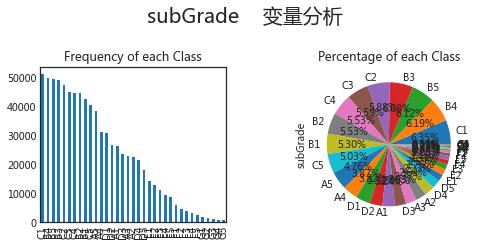

subGrade


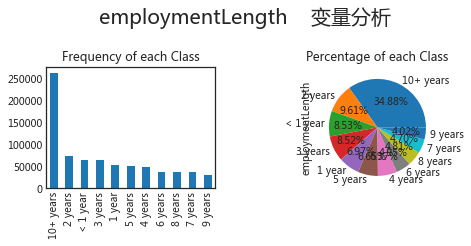

employmentLength


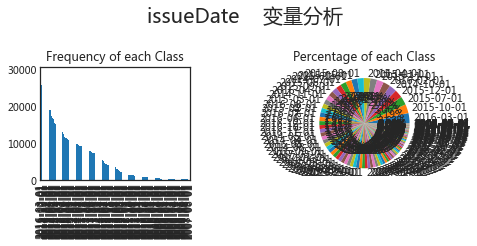

issueDate


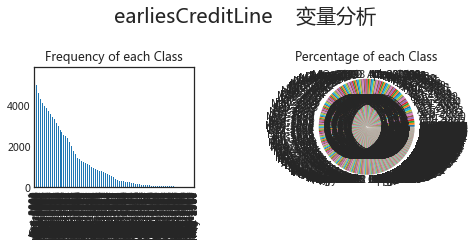

earliesCreditLine
跑批完成


In [77]:
def class_anlysis(data, col):
    f, ax = plt.subplots(1, 2, figsize=(8,4))
    data[col].value_counts().plot(kind='bar',ax=ax[0])
    ax[0].set_title("Frequency of each Class")
    data[col].value_counts().plot(x=None, y=None, kind='pie', autopct='%1.2f%%', ax=ax[1])
    ax[1].set_title("Percentage of each Class")
    
    f.suptitle("%s    变量分析" % str(str(col)),fontsize=20)
    f.tight_layout( pad = 5)
    plt.show()

# 绘制分类变量图形
for col in categorical_col:
    class_anlysis(train_df, col)
    print(col)

print("跑批完成")